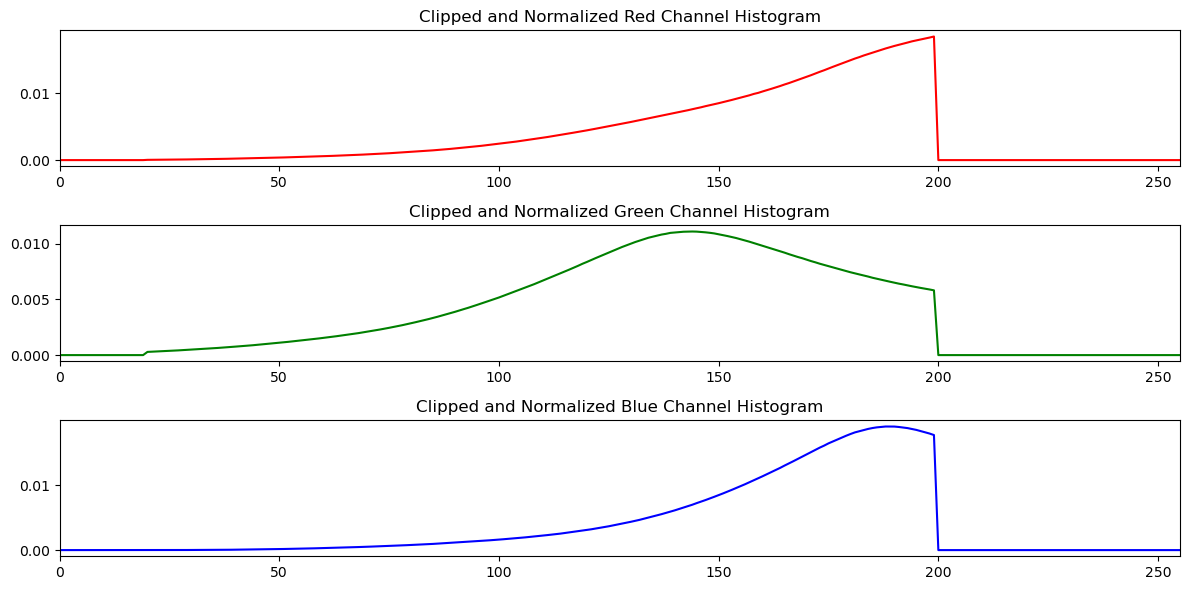

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_rgb_histogram(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Split the image into R, G, B channels
    r_channel, g_channel, b_channel = cv2.split(image)
    
    # Calculate histograms for each channel
    r_hist, _ = np.histogram(r_channel, bins=256, range=(0, 256))
    g_hist, _ = np.histogram(g_channel, bins=256, range=(0, 256))
    b_hist, _ = np.histogram(b_channel, bins=256, range=(0, 256))
    
    # Function to remove specified bins and normalize histogram
    def remove_and_normalize(hist):
        # Remove the bins from 0-20 and 200-255
        hist[:20] = 0
        hist[200:] = 0
        
        # Normalize the histogram
        normalized_hist = hist / np.sum(hist) if np.sum(hist) > 0 else hist
        return normalized_hist
    
    # Remove and normalize each histogram
    r_hist_normalized = remove_and_normalize(r_hist)
    g_hist_normalized = remove_and_normalize(g_hist)
    b_hist_normalized = remove_and_normalize(b_hist)
    
    # Create a figure to plot the new histograms
    plt.figure(figsize=(12, 6))
    
    # Plot R channel histogram
    plt.subplot(3, 1, 1)
    plt.plot(r_hist_normalized, color='red')
    plt.title('Clipped and Normalized Red Channel Histogram')
    plt.xlim([0, 255])
    
    # Plot G channel histogram
    plt.subplot(3, 1, 2)
    plt.plot(g_hist_normalized, color='green')
    plt.title('Clipped and Normalized Green Channel Histogram')
    plt.xlim([0, 255])
    
    # Plot B channel histogram
    plt.subplot(3, 1, 3)
    plt.plot(b_hist_normalized, color='blue')
    plt.title('Clipped and Normalized Blue Channel Histogram')
    plt.xlim([0, 255])
    
    # Show the plots
    plt.tight_layout()
    plt.show()


image_path = r"C:\Users\lakho\Desktop\URECA\Whole Slide Images .svs\Level 1\TCGA-5M-AATE-01Z-00-DX1.483FFD2F-61A1-477E-8F94-157383803FC7_level_1.jpg"  # Replace with your image path
plot_rgb_histogram(image_path)



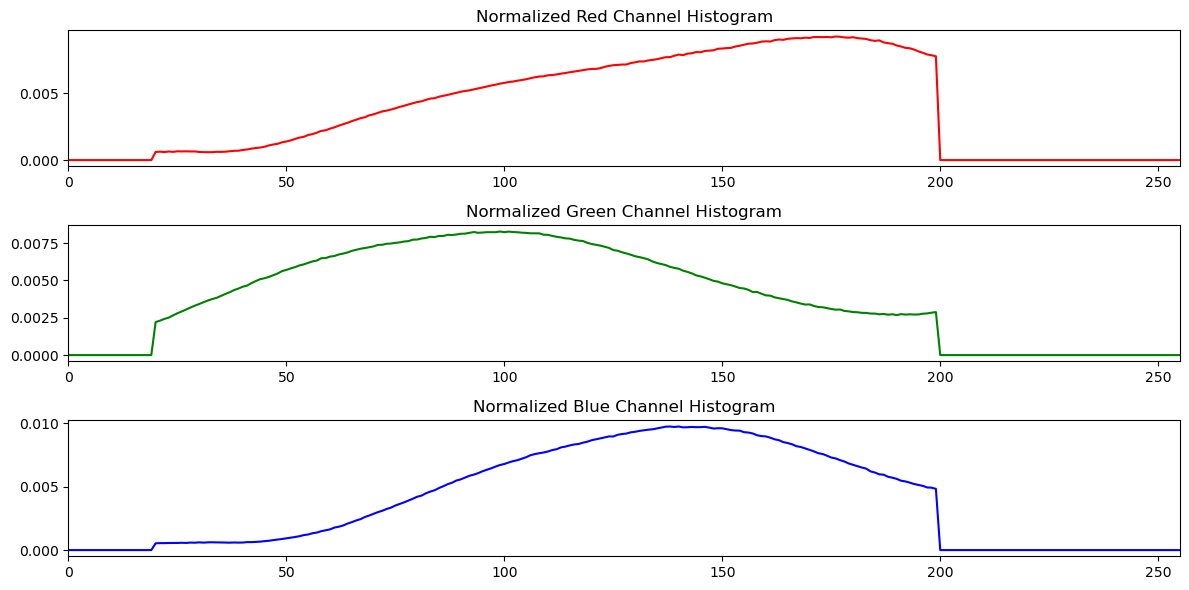

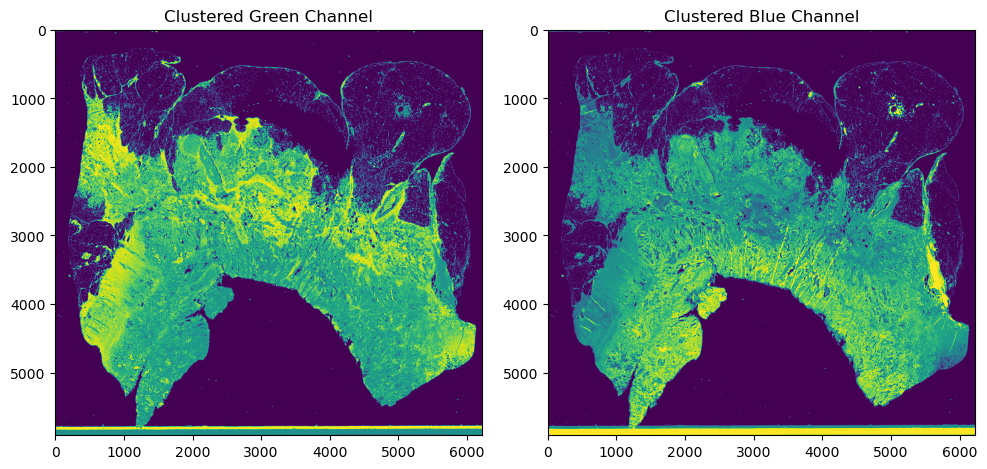

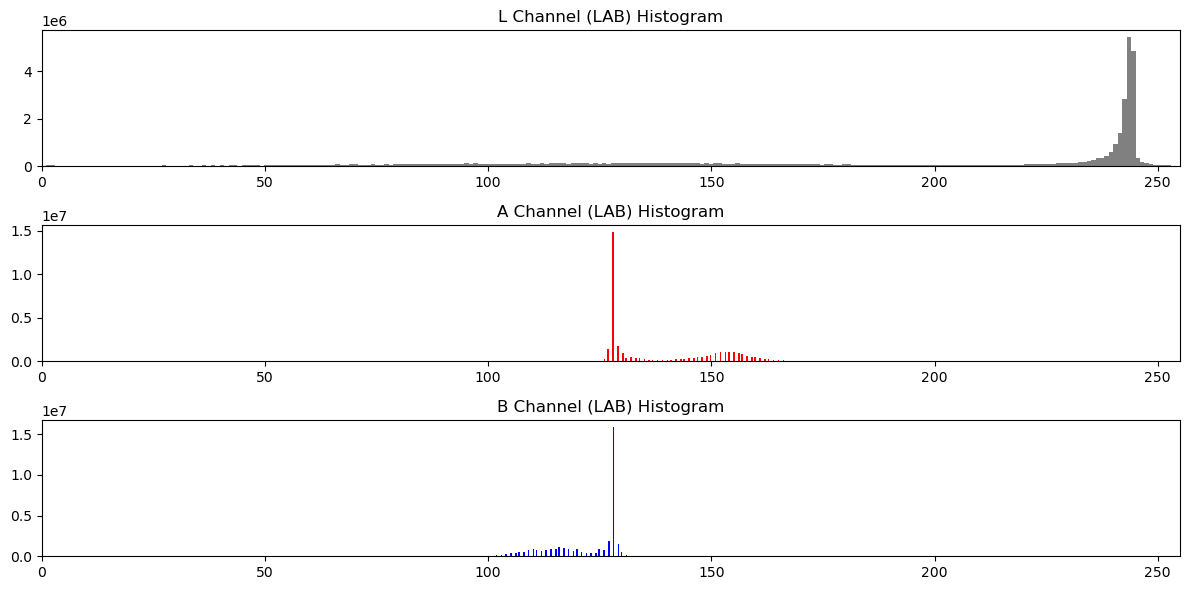

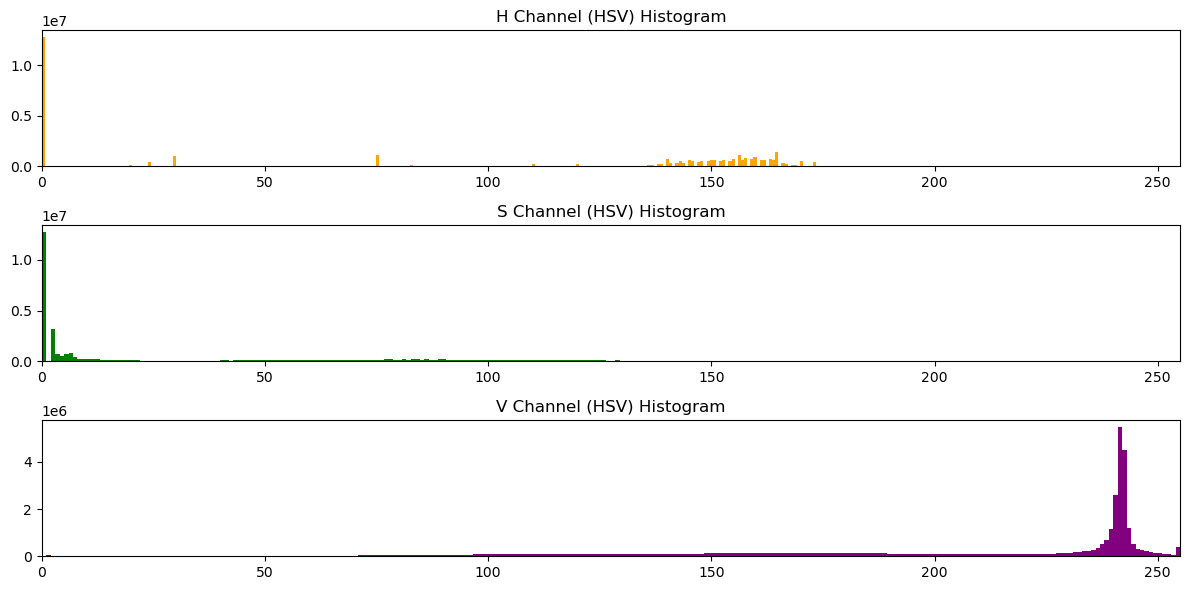

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_histograms_with_clustering(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Split the RGB channels
    r_channel, g_channel, b_channel = cv2.split(image_rgb)

    # Function to remove bins in the range 0-20 and 200-255, normalize, and return histogram
    def remove_and_normalize(hist):
        hist[:20] = 0
        hist[200:] = 0
        return hist / np.sum(hist) if np.sum(hist) > 0 else hist

    # Cluster green and blue channels into intensity clusters
    def cluster_channel(channel, n_clusters=3):
        # Flatten the channel to 1D and cluster intensities
        pixel_values = channel.flatten().reshape(-1, 1)
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(pixel_values)
        labels = kmeans.labels_.reshape(channel.shape)
        return labels

    # Normalize and calculate histograms for R, G, B
    r_hist, _ = np.histogram(r_channel, bins=256, range=(0, 256))
    g_hist, _ = np.histogram(g_channel, bins=256, range=(0, 256))
    b_hist, _ = np.histogram(b_channel, bins=256, range=(0, 256))

    r_hist_normalized = remove_and_normalize(r_hist)
    g_hist_normalized = remove_and_normalize(g_hist)
    b_hist_normalized = remove_and_normalize(b_hist)

    # Plot histograms for RGB
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.plot(r_hist_normalized, color='red')
    plt.title('Normalized Red Channel Histogram')
    plt.xlim([0, 255])

    plt.subplot(3, 1, 2)
    plt.plot(g_hist_normalized, color='green')
    plt.title('Normalized Green Channel Histogram')
    plt.xlim([0, 255])

    plt.subplot(3, 1, 3)
    plt.plot(b_hist_normalized, color='blue')
    plt.title('Normalized Blue Channel Histogram')
    plt.xlim([0, 255])

    plt.tight_layout()
    plt.show()

    # Cluster Green and Blue channels
    g_clusters = cluster_channel(g_channel, n_clusters=3)
    b_clusters = cluster_channel(b_channel, n_clusters=3)

    # Plot clustered images for G and B
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(g_clusters, cmap='viridis')
    plt.title('Clustered Green Channel')

    plt.subplot(1, 2, 2)
    plt.imshow(b_clusters, cmap='viridis')
    plt.title('Clustered Blue Channel')

    plt.tight_layout()
    plt.show()

    # Convert the image to LAB and HSV
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Split LAB and HSV channels
    l_channel, a_channel, b_lab_channel = cv2.split(image_lab)
    h_channel, s_channel, v_channel = cv2.split(image_hsv)

    # Plot histograms for LAB
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.hist(l_channel.flatten(), bins=256, color='gray')
    plt.title('L Channel (LAB) Histogram')
    plt.xlim([0, 255])

    plt.subplot(3, 1, 2)
    plt.hist(a_channel.flatten(), bins=256, color='red')
    plt.title('A Channel (LAB) Histogram')
    plt.xlim([0, 255])

    plt.subplot(3, 1, 3)
    plt.hist(b_lab_channel.flatten(), bins=256, color='blue')
    plt.title('B Channel (LAB) Histogram')
    plt.xlim([0, 255])

    plt.tight_layout()
    plt.show()

    # Plot histograms for HSV
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.hist(h_channel.flatten(), bins=256, color='orange')
    plt.title('H Channel (HSV) Histogram')
    plt.xlim([0, 255])

    plt.subplot(3, 1, 2)
    plt.hist(s_channel.flatten(), bins=256, color='green')
    plt.title('S Channel (HSV) Histogram')
    plt.xlim([0, 255])

    plt.subplot(3, 1, 3)
    plt.hist(v_channel.flatten(), bins=256, color='purple')
    plt.title('V Channel (HSV) Histogram')
    plt.xlim([0, 255])

    plt.tight_layout()
    plt.show()


image_path = r"C:\Users\lakho\Desktop\URECA\Whole Slide Images .svs\Level 2\TCGA-4N-A93T-01Z-00-DX2.875E7F95-A6D4-4BEB-A331-F9D8080898C2_level_2.jpg"  # Replace with your image path
plot_histograms_with_clustering(image_path)
